In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Step 1: Load the dataset
file_path = "heart_attack_china.csv"  # Update with your actual dataset path
data = pd.read_csv(file_path)


In [5]:
print(data.head())   # Check first few rows
print(data.info())   # Check data types & missing values
print(data.describe())  # Summary statisticsprint(data.head())   # Check first few rows
print(data.info())   # Check data types & missing values
print(data.describe())  # Summary statistics

   Patient_ID  Age  Gender Smoking_Status Hypertension Diabetes Obesity  \
0           1   55    Male     Non-Smoker           No       No     Yes   
1           2   66  Female         Smoker          Yes       No      No   
2           3   69  Female         Smoker           No       No      No   
3           4   45  Female         Smoker           No      Yes      No   
4           5   39  Female         Smoker           No       No      No   

  Cholesterol_Level Air_Pollution_Exposure Physical_Activity  ...  \
0            Normal                   High              High  ...   
1               Low                 Medium              High  ...   
2               Low                 Medium              High  ...   
3            Normal                 Medium               Low  ...   
4            Normal                 Medium            Medium  ...   

  Hospital_Availability TCM_Use Employment_Status Education_Level  \
0                   Low     Yes        Unemployed         Primary

In [7]:
# Step 3: Preprocessing
# Handle missing values (drop or impute)
data = data.dropna()  # Drop rows with missing values

In [9]:
# Convert categorical columns (if any) using One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

In [18]:
corrected_column = [col for col in data.columns if "heart" in col.lower()]
print(corrected_column)



['Previous_Heart_Attack_Yes', 'Heart_Attack_Yes']


In [22]:
X = data.drop(columns=corrected_column)  # Use the correct column name
y = data[corrected_column[0]]


In [24]:
# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Step 5: Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Step 6: Predictions
y_pred = rf.predict(X_test)

In [30]:
# Step 7: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8997495129418314

Classification Report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95     32328
        True       0.00      0.00      0.00      3602

    accuracy                           0.90     35930
   macro avg       0.45      0.50      0.47     35930
weighted avg       0.81      0.90      0.85     35930


Confusion Matrix:
 [[32328     0]
 [ 3602     0]]


C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


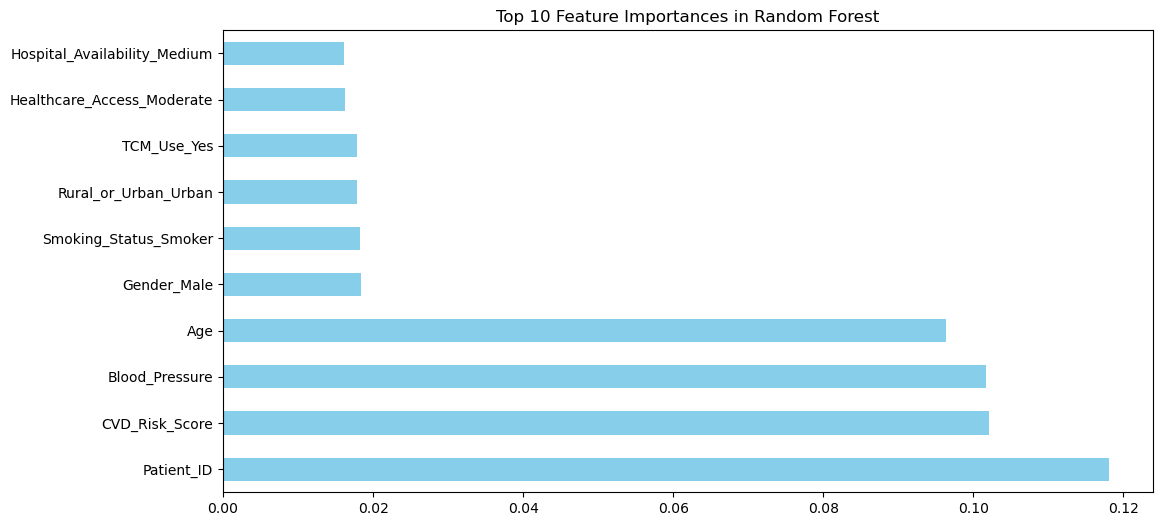

In [32]:
# Step 8: Feature Importance Plot
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {
    'n_estimators': [50, 100],  # Reduce options
    'max_depth': [10, 20],      # Keep fewer values
    'min_samples_split': [2, 5]
}


In [45]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings sampled
    cv=3,       # Reduce cross-validation folds
    verbose=1,
    n_jobs=-1   # Use all available CPU cores
)

random_search.fit(X_train, y_train)



C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   verbose=1)

In [46]:
# Grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)


In [49]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [51]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [53]:
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [55]:
y_pred = best_rf.predict(X_test)

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95     32328
        True       0.00      0.00      0.00      3602

    accuracy                           0.90     35930
   macro avg       0.45      0.50      0.47     35930
weighted avg       0.81      0.90      0.85     35930


Confusion Matrix:
 [[32328     0]
 [ 3602     0]]


C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


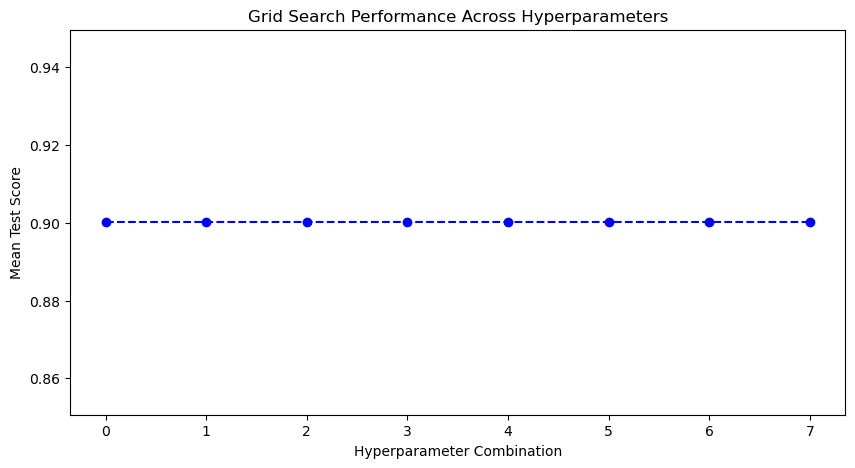

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert grid search results to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot mean test score for each hyperparameter combination
plt.figure(figsize=(10, 5))
plt.plot(results["mean_test_score"], marker='o', linestyle='dashed', color='b')
plt.xlabel("Hyperparameter Combination")
plt.ylabel("Mean Test Score")
plt.title("Grid Search Performance Across Hyperparameters")
plt.show()


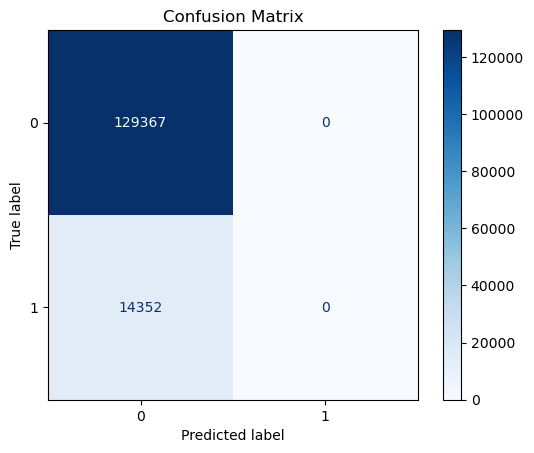

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = grid_search.best_estimator_.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


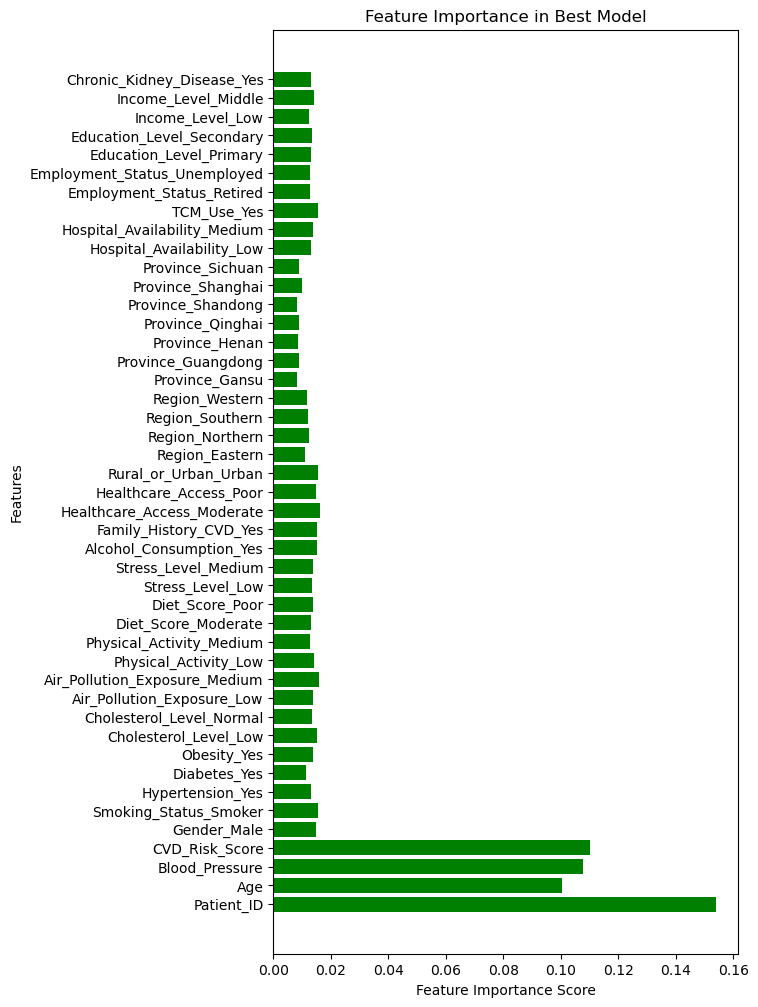

In [65]:
import numpy as np

best_model = grid_search.best_estimator_
feature_importance = best_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(6, 12))
plt.barh(features, feature_importance, color='green')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Best Model")
plt.show()


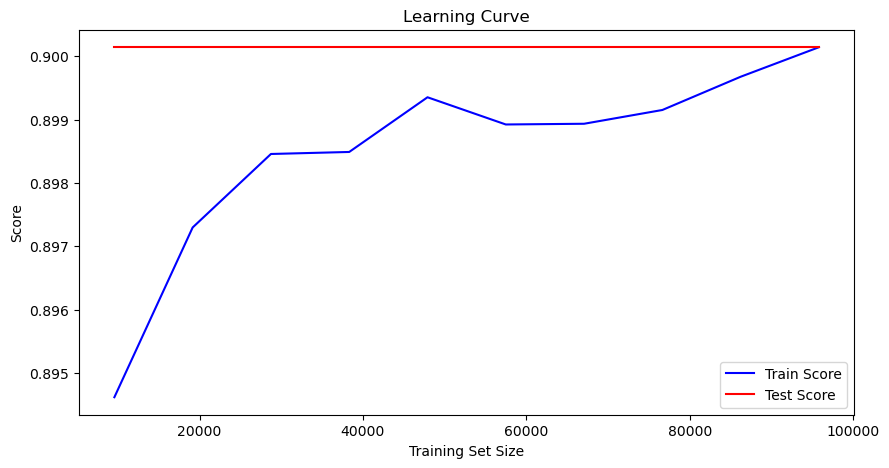

In [67]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score", color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test Score", color='red')
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend()
plt.show()


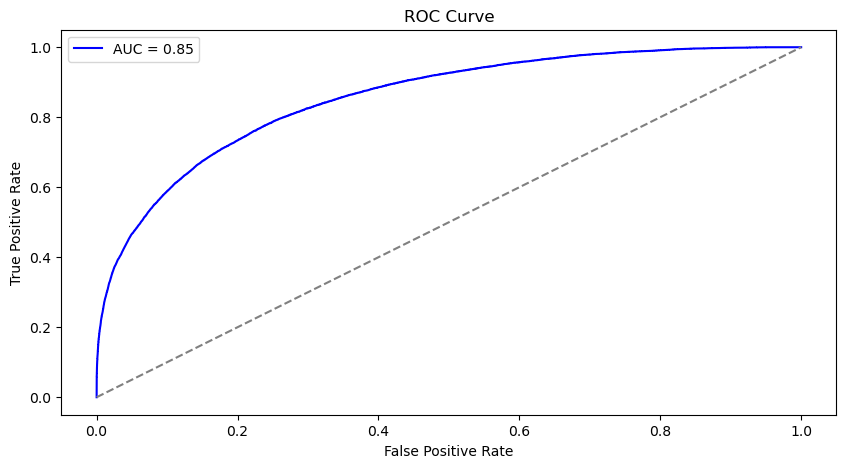

In [69]:
from sklearn.metrics import roc_curve, auc

y_prob = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
fpr, tpr, _ = roc_curve(y_train, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a base model (weak learner)
base_model = DecisionTreeClassifier(max_depth=5)

# Create a Bagging Classifier with 50 base estimators
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42, n_jobs=-1)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Predictions
y_pred_bagging = bagging_model.predict(X_train)

# Evaluate performance
bagging_acc = accuracy_score(y_train, y_pred_bagging)
print(f"Bagging Model Accuracy: {bagging_acc:.2f}")


Bagging Model Accuracy: 0.90


In [73]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost model using a Decision Tree as the base learner
boosting_model = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3),  # Weak learner
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

# Train the Boosting model
boosting_model.fit(X_train, y_train)

# Predictions
y_pred_boosting = boosting_model.predict(X_train)

# Evaluate performance
boosting_acc = accuracy_score(y_train, y_pred_boosting)
print(f"Boosting Model Accuracy: {boosting_acc:.2f}")


C:\Users\SANKET\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Model Accuracy: 0.90


In [75]:
from xgboost import XGBClassifier

# Create an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_train)

# Evaluate performance
xgb_acc = accuracy_score(y_train, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_acc:.2f}")


XGBoost Model Accuracy: 0.90


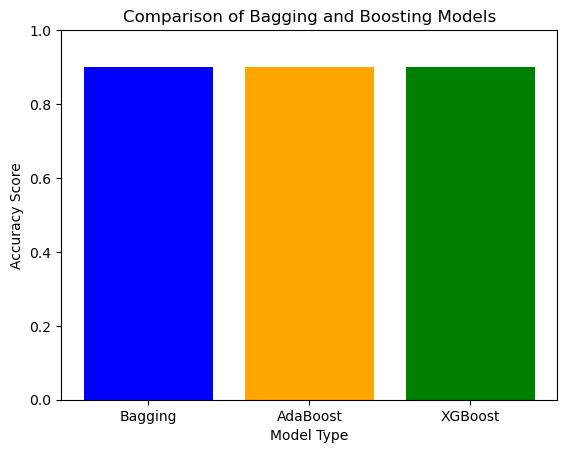

In [77]:
import matplotlib.pyplot as plt

models = ["Bagging", "AdaBoost", "XGBoost"]
accuracy = [bagging_acc, boosting_acc, xgb_acc]

plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.xlabel("Model Type")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Bagging and Boosting Models")
plt.ylim(0, 1)
plt.show()

